In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv("Amazon Sale Report.csv")

C:\Users\vinshul jain\AppData\Local\Temp\ipykernel_2508\1760764839.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Amazon Sale Report.csv")


In [3]:
df["Date"]=pd.to_datetime(df["Date"])

C:\Users\vinshul jain\AppData\Local\Temp\ipykernel_2508\1380596044.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"]=pd.to_datetime(df["Date"])


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128975 non-null  int64         
 1   Order ID            128975 non-null  object        
 2   Date                128975 non-null  datetime64[ns]
 3   Status              128975 non-null  object        
 4   Fulfilment          128975 non-null  object        
 5   Sales Channel       128975 non-null  object        
 6   ship-service-level  128975 non-null  object        
 7   Style               128975 non-null  object        
 8   SKU                 128975 non-null  object        
 9   Category            128975 non-null  object        
 10  Size                128975 non-null  object        
 11  ASIN                128975 non-null  object        
 12  Courier Status      122103 non-null  object        
 13  Qty                 128975 no

.

## Labels & Titles

plt.title("Chart Title") → Add title

plt.xlabel("X-axis Label")

plt.ylabel("Y-axis Label")

plt.legend() → Show legends for multiple plots

plt.text(x, y, "Text") → Annotate text on plot

## Customization

plt.xlim(min, max) → Set x-axis range

plt.ylim(min, max) → Set y-axis range

plt.xticks([list], labels) / plt.yticks() → Customize ticks

plt.grid(True) → Add gridlines

plt.style.use('ggplot') → Use predefined styles

plt.figure(figsize=(8,6)) → Set figure size

## Multiple Plots

plt.subplot(rows, cols, index) → Multiple plots in one figure

plt.subplots(nrows, ncols) → Create grid of plots (object-oriented way)

## Save & Show

plt.show() → Display the plot

plt.savefig("filename.png", dpi=300) → Save figure

...

# Plot
# (i) Line

 defination:-A line plot visualizes the relationship between two variables—typically one on the x-axis (independent variable) and one on the y-axis (dependent variable). It's ideal for tracking changes, comparing patterns, or identifying correlations.

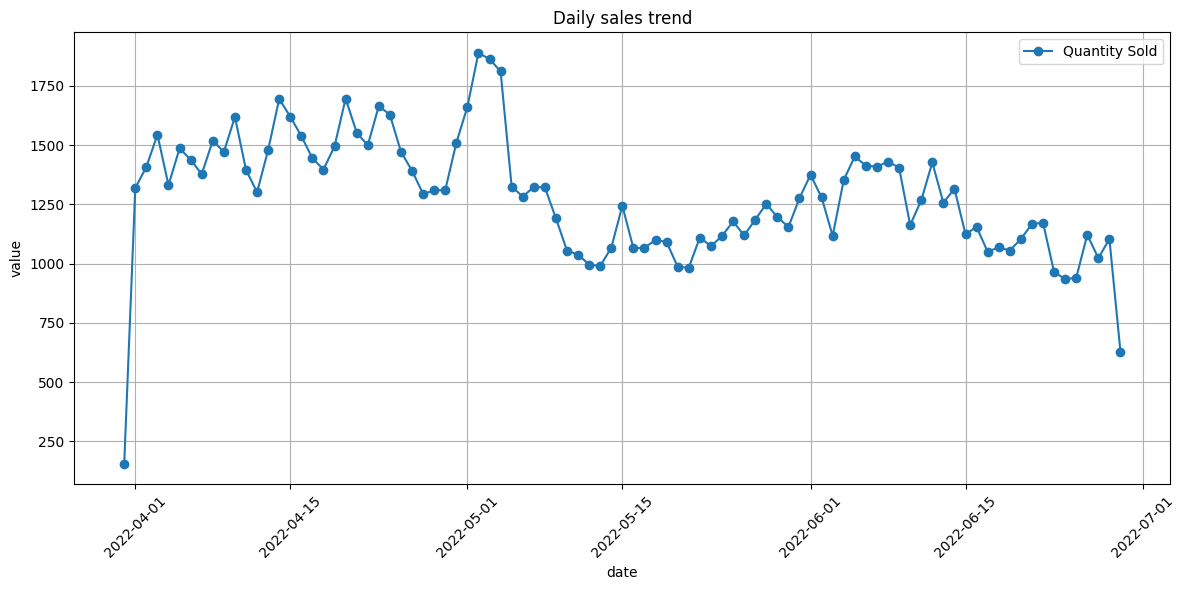

In [11]:
daily_data=df.groupby(df["Date"].dt.date)[["Qty","Amount"]].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(daily_data["Date"],daily_data["Qty"],label='Quantity Sold',marker='o')
# plt.plot(daily_data["Date"],daily_data["Amount"],label="Revenue",marker='s')
plt.xlabel("date")
plt.ylabel("value")
plt.title("Daily sales trend")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
daily_data

,Date,Qty,Amount
0,2022-03-31,156,101683.85
1,2022-04-01,1319,865478.60
2,2022-04-02,1408,913101.53
3,2022-04-03,1544,1011763.38
4,2022-04-04,1331,882059.17
...,...,...,...
86,2022-06-25,940,654234.58
87,2022-06-26,1122,773610.02
88,2022-06-27,1023,714124.67
89,2022-06-28,1104,772085.53


# (ii) Scatter Plot

A scatter plot is a type of data visualization that displays values for two variables as points on a Cartesian coordinate system. Each point represents an observation in the dataset, with:

X-axis showing one variable

Y-axis showing another variable

It’s primarily used to identify relationships or correlations between the two variables—whether they move together (positive correlation), move oppositely (negative correlation), or show no clear pattern (no correlation).

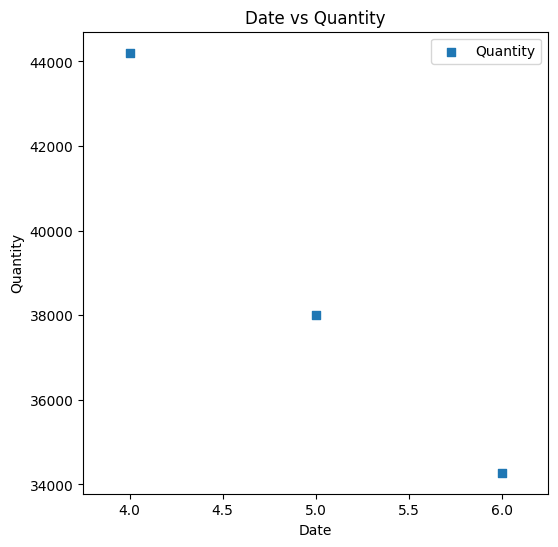

In [15]:
scatter_fliter=df.groupby(df["Date"].dt.month)["Qty"].sum().reset_index()
scatter_fliter=scatter_fliter[(scatter_fliter["Date"]>3)]
plt.figure(figsize=(6,6))
plt.scatter(scatter_fliter["Date"],scatter_fliter["Qty"],label="Quantity",marker="s")
# plt.grid(True)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title("Date vs Quantity")
plt.xlim(3.75,6.25)
plt.show()

In [16]:
scatter_fliter

,Date,Qty
1,4,44206
2,5,38011
3,6,34276


# Bar Chart

A bar chart (or bar graph) is a graphical representation of data using rectangular bars. These bars can be vertical or horizontal, and their length or height is proportional to the values they represent.

### Key Features:
X-axis: Represents categories or groups.

Y-axis: Represents numerical values or frequencies.

Bars: Each bar corresponds to a category and its value.

Spacing: Bars are usually spaced evenly to make comparisons easy.

### Use Cases:
Comparing sales across months

Showing population distribution by age group

Visualizing survey results

In [19]:
Bar_filter=df.groupby("Category")["Category"].count().reset_index(name="Count")

In [20]:
Bar_filter

,Category,Count
0,Blouse,926
1,Bottom,440
2,Dupatta,3
3,Ethnic Dress,1159
4,Saree,164
5,Set,50284
6,Top,10622
7,Western Dress,15500
8,kurta,49877


In [21]:
Bar_filter=Bar_filter.sort_values(by="Count").head(5)
Bar_filter

,Category,Count
2,Dupatta,3
4,Saree,164
1,Bottom,440
0,Blouse,926
3,Ethnic Dress,1159


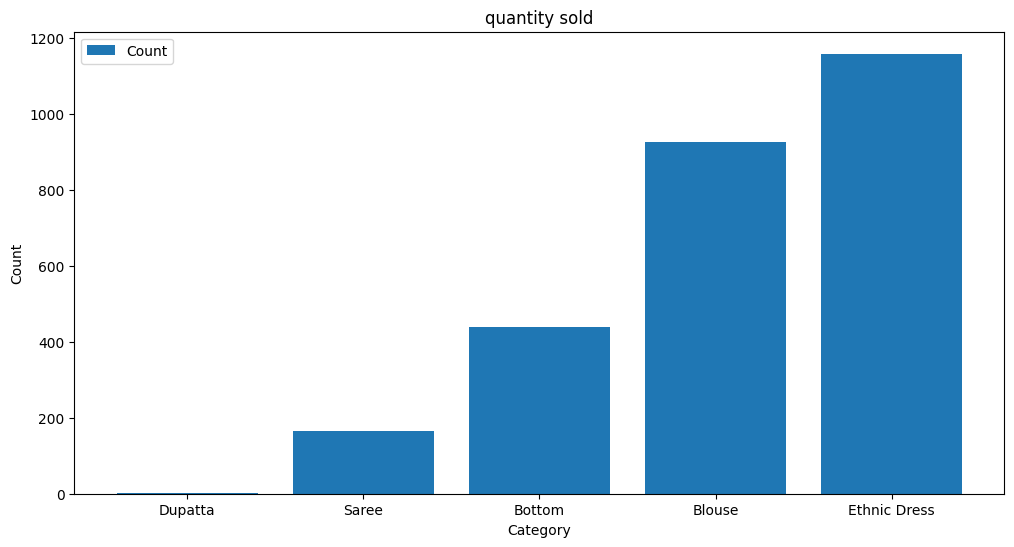

In [22]:
plt.figure(figsize=(12,6))
plt.bar(Bar_filter["Category"],Bar_filter["Count"],label="Count")
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("quantity sold")
plt.legend()
plt.show()

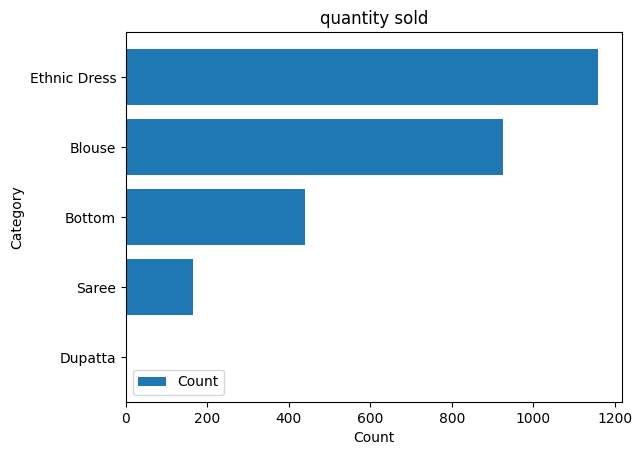

In [23]:
plt.barh(Bar_filter["Category"],Bar_filter["Count"],label="Count")
plt.ylabel("Category")
plt.xlabel("Count")
plt.title("quantity sold")
plt.legend()
plt.show()

# Histogram

A histogram is a type of graph used to represent the distribution of numerical data. It organizes data into continuous intervals (called bins) and displays how many data points fall into each bin using adjacent vertical bars.

### Key Features of a Histogram
X-axis: Represents the range of values (e.g., age groups, salary brackets).

Y-axis: Shows the frequency—how many data points fall within each range.

Bars: Each bar represents a bin, and the height reflects the count of data points in that bin.

No gaps between bars: Unlike bar charts, histogram bars touch each other, emphasizing continuity.

### Why Histograms Matter in Data Analysis
Visualize distribution: Quickly see if data is skewed, symmetrical, or has outliers.

Identify patterns: Spot clusters, gaps, or unusual spikes.

Support decision-making: Understand variability and central tendencies before applying statistical models.

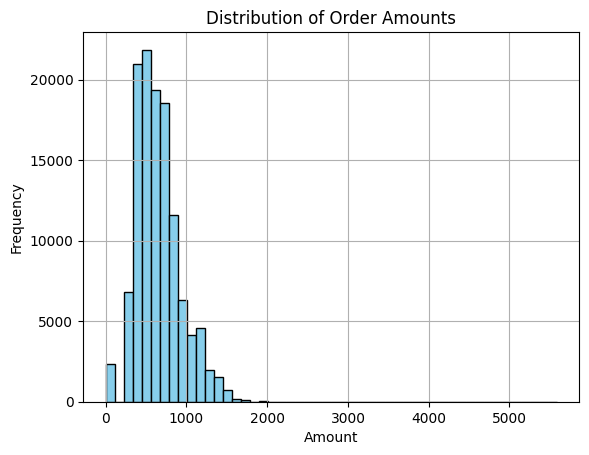

In [26]:
df['Amount'].dropna().hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Order Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


# Pie Chart

A pie chart is a circular graph used to show how a whole is divided into parts. Each slice represents a proportion or percentage of the total, making it perfect for visualizing categorical data like sales by region, expenses by category, or survey results.

### When to Use a Pie Chart
You want to show relative proportions of categories

Your data adds up to a meaningful whole (like 100%)

You have fewer than 6 categories (too many slices can get messy)

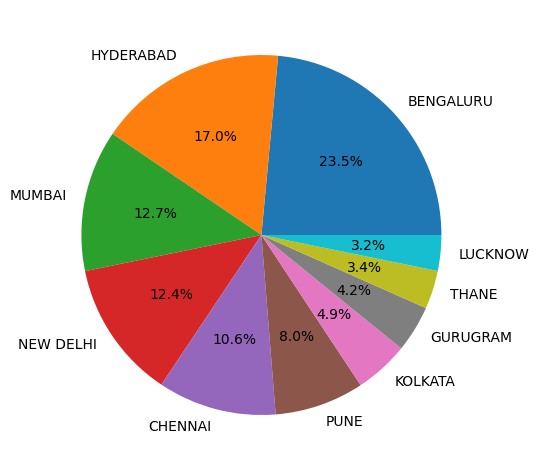

<Figure size 1200x600 with 0 Axes>

In [58]:
grouped = df.groupby("ship-city")["Amount"].sum().nlargest(10)
plt.pie(grouped.values, labels=grouped.index, autopct='%1.1f%%')
plt.tight_layout()
plt.figure(figsize=(16,6))
plt.show()